# Workflow:
## Newly measured data will have to be converted to h5 files using convert_to_h5( directory )
## Then you load all the files in that directory using load_files( directory ) 

In [32]:


#from pptx import Presentation
#from pptx.util import Inches


def get_channels( file, fmt='raw' ):

    topo1 = usid.USIDataset(file['Measurement_000/Channel_000/Raw_Data']) 
    ampl1 = usid.USIDataset(file['Measurement_000/Channel_001/Raw_Data']) 
    phase1 = usid.USIDataset(file['Measurement_000/Channel_003/Raw_Data']) 
    ampl2 = usid.USIDataset(file['Measurement_000/Channel_002/Raw_Data']) 
    phase2 = usid.USIDataset(file['Measurement_000/Channel_004/Raw_Data']) 
    
    
    if fmt == 'arr':
        topo1_nd = np.transpose(topo1.get_n_dim_form().squeeze())
        ampl1_nd = np.transpose(ampl1.get_n_dim_form().squeeze())
        ampl2_nd = np.transpose(ampl2.get_n_dim_form().squeeze())
        phase1_nd = np.transpose(phase1.get_n_dim_form().squeeze())
        phase2_nd = np.transpose(phase2.get_n_dim_form().squeeze())
    
        if len(file['Measurement_000']) >10:
            topo2 = usid.USIDataset(file['Measurement_000/Channel_006/Raw_Data']) 
            topo2_nd = np.transpose(topo2.get_n_dim_form().squeeze())
        
            return [topo1_nd, ampl1_nd, phase1_nd, ampl2_nd, phase2_nd, topo2_nd]
        return [topo1_nd, ampl1_nd, phase1_nd, ampl2_nd, phase2_nd]
        
    
    if len(file['Measurement_000']) >10:
        topo2 = usid.USIDataset(file['Measurement_000/Channel_006/Raw_Data']) 
        topo2_nd = np.transpose(topo2.get_n_dim_form().squeeze())
        
        return [topo1, ampl1, phase1, ampl2, phase2, topo2]
    
    return [topo1, ampl1, phase1, ampl2, phase2]
    
def single_image_plot(image, title, xvec, cmap=plt.cm.afmhot, zrange=None, axis=None, fig=None, posn=None, **kwargs):
    if axis is None:
        fig, axis = plt.subplots()   
        #gs = gridspec.GridSpec(1)

    #xvec = np.linspace( 0, usid.hdf_utils.get_attributes(experiment[i]['Measurement_000'])['ScanSize']/10**(-6), len(image[0]))
    
    if zrange is None:
        
        usid.plot_utils.plot_map(axis, image, cmap=cmap, x_vec = xvec, y_vec=xvec)
        #axis.set_title(title)    
        axis.set_xlabel('X ($\mathrm{\mu}$m)')
        axis.set_ylabel('Y ($\mathrm{\mu}$m)')
    else:
        
        usid.plot_utils.plot_map(axis, image, cmap=cmap, vmin=zrange[0], vmax=zrange[1], x_vec = xvec, y_vec=xvec, **kwargs)
        #axis.set_title(title)        
        axis.set_xlabel('X ($\mathrm{\mu}$m)')
        axis.set_ylabel('Y ($\mathrm{\mu}$m)')

    return fig, axis
    
    
def multi_image_plot(images, experiment, titles=None, cmap=plt.cm.afmhot, 
                     zrange=None, axis=None, fig=None,  gs=None, 
                     posn=None, ntick=4, **kwargs):
    """
    Handy function that plots three image channels side by side with colorbars

    Parameters
    ----------
    images     : list or array-like
                List of three images defined as 2D numpy arrays
    experiment : list or array
                The list of datafiles from the PFM measurements
    titles     : (Optional) list or array-like (optional)
                List of the titles for each image
    cmap       : (Optional) matplotlib.pyplot colormap object or string 
                Colormap to use for displaying the images
    zrange     : (Optional) list of array-like 
                List of z_ranges for height, amplitude, and phase images respectively 
    axis       : (Optional) matplotlib axis 
    
    fig        : (Optional) matplotlib figure 

    Returns
    -------
    fig : Figure
        Figure containing the plots
    axes : 1D array_like of axes objects
        Axes of the individual plots within `fig`
    """
    ph1 = -90
    ph2 = ph1 + 360
    z_range = [ (-2, 2), (0, 0.7),(ph1,ph2) ] # Preset height, amplitude, and phase channel max/min

    channel1 = [ t1, a1, p1 ]
    #channel2 = [ t1, a2, p2 ]
    titles = ['topo', 'ampl', 'phase']
    if axis is None:

        fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,4))   
        gs = gridspec.GridSpec(1, 3)

    xvec = np.linspace( 0, usid.hdf_utils.get_attributes(experiment[i]['Measurement_000'])['ScanSize']/10**(-6), len(images[0]))
    axes = []
    if zrange is None:
        
        for pos, img, title in zip(gs, images, titles):
            axis = fig.add_subplot(pos)
            usid.plot_utils.plot_map(axis, img, stdevs=3, num_ticks=4,
                                     cmap=cmap, x_vec = xvec, y_vec=xvec)
            axis.set_title(title, fontsize=12) 
            axis.set_xlabel('X ($\mathrm{\mu}$m)')
            if pos == gs[0]:
                axis.set_ylabel('Y ($\mathrm{\mu}$m)')
            axes.append(axis)
    else:
        for pos, img, title, zrange in zip(gs, images, titles, zrange):
            axis = fig.add_subplot(pos)
            usid.plot_utils.plot_map(axis, img, cmap=cmap, num_ticks=ntick,
                                     vmin=zrange[0], vmax=zrange[1],
                                     x_vec = xvec, y_vec=xvec)
            axis.set_title(title)        
            axis.set_xlabel('X ($\mathrm{\mu}$m)')
            if pos == gs[0]:
                axis.set_ylabel('Y ($\mathrm{\mu}$m)')
            axes.append(axis)


    return fig, axes

def convert_to_h5( directory ):
    trans = px.io.translators.igor_ibw.IgorIBWTranslator()
    c = 1
    for file in os.listdir( diry ):
        if file.endswith(".ibw"):
            tmp = trans.translate( diry + file)
            h5_file = h5py.File( tmp, mode='r' ) 
            print(os.path.join( diry, file ) + " - " + str(c))
            experiment.append( h5_file )
            h5_file.close()
            c = c + 1
    print('Completed')
    return
    
def load_files( directory ):
    
    experiment = [ h5py.File( os.path.join(directory,file), mode='r' ) for file in os.listdir(diry) if file.endswith(".h5")]
    filenames = [ file for file in os.listdir(diry) if file.endswith(".h5")]
    
    return experiment, filenames

##### Here

In [33]:
import os

scans = []
topo, ampl1, ampl2, phase1, phase2 = [], [], [], [], []
experiment = []

# Here you can paste the directory of the scans you want to look at
diry = r"data"
c = 0



# Only execute the below cell if you want to convert IBW files to h5. This conversion only needs to be done once.

In [20]:

convert_to_h5( diry )

Completed


In [34]:
%qtconsole

# Load files in directory here

In [35]:
expt, fnames = load_files( diry )
j=0
for name in fnames:
    print(name + ' - ' + str(j))
    j += 1

P0125OP0000.h5 - 0
P0125OP0001.h5 - 1
P0125OP0002.h5 - 2
P0125OP0003.h5 - 3
P0125OP0004.h5 - 4
P0125OP0005.h5 - 5
P0125OP0006.h5 - 6
P0125OP0007.h5 - 7
P0142OP0000.h5 - 8
P0142OP0001.h5 - 9


# Use the numbers in previous cell output to pick which scan you want to look at
## The cell below loads the data from one scan into variables representing the topography, amplitude1, phase1, amplitude2, and phase2 channels

In [45]:
i = 3
plt.close(fig='all')
[t1, a1, p1, a2, p2] = get_channels( expt[i], fmt='arr' )


C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


# Plotting
### The below cell plots the topography, amplitude and phase of the scan. 
#### You can pick which amplitude or phase channel you use by changing a1 to a2 and vice versa when defining the "channel1" variable
#### You can adjust the topography, amplitude and phase ranges by changing the numbers in the z_range, a_range, and p_range variables

Text(0.8, 0.9, 'P0125OP0003')

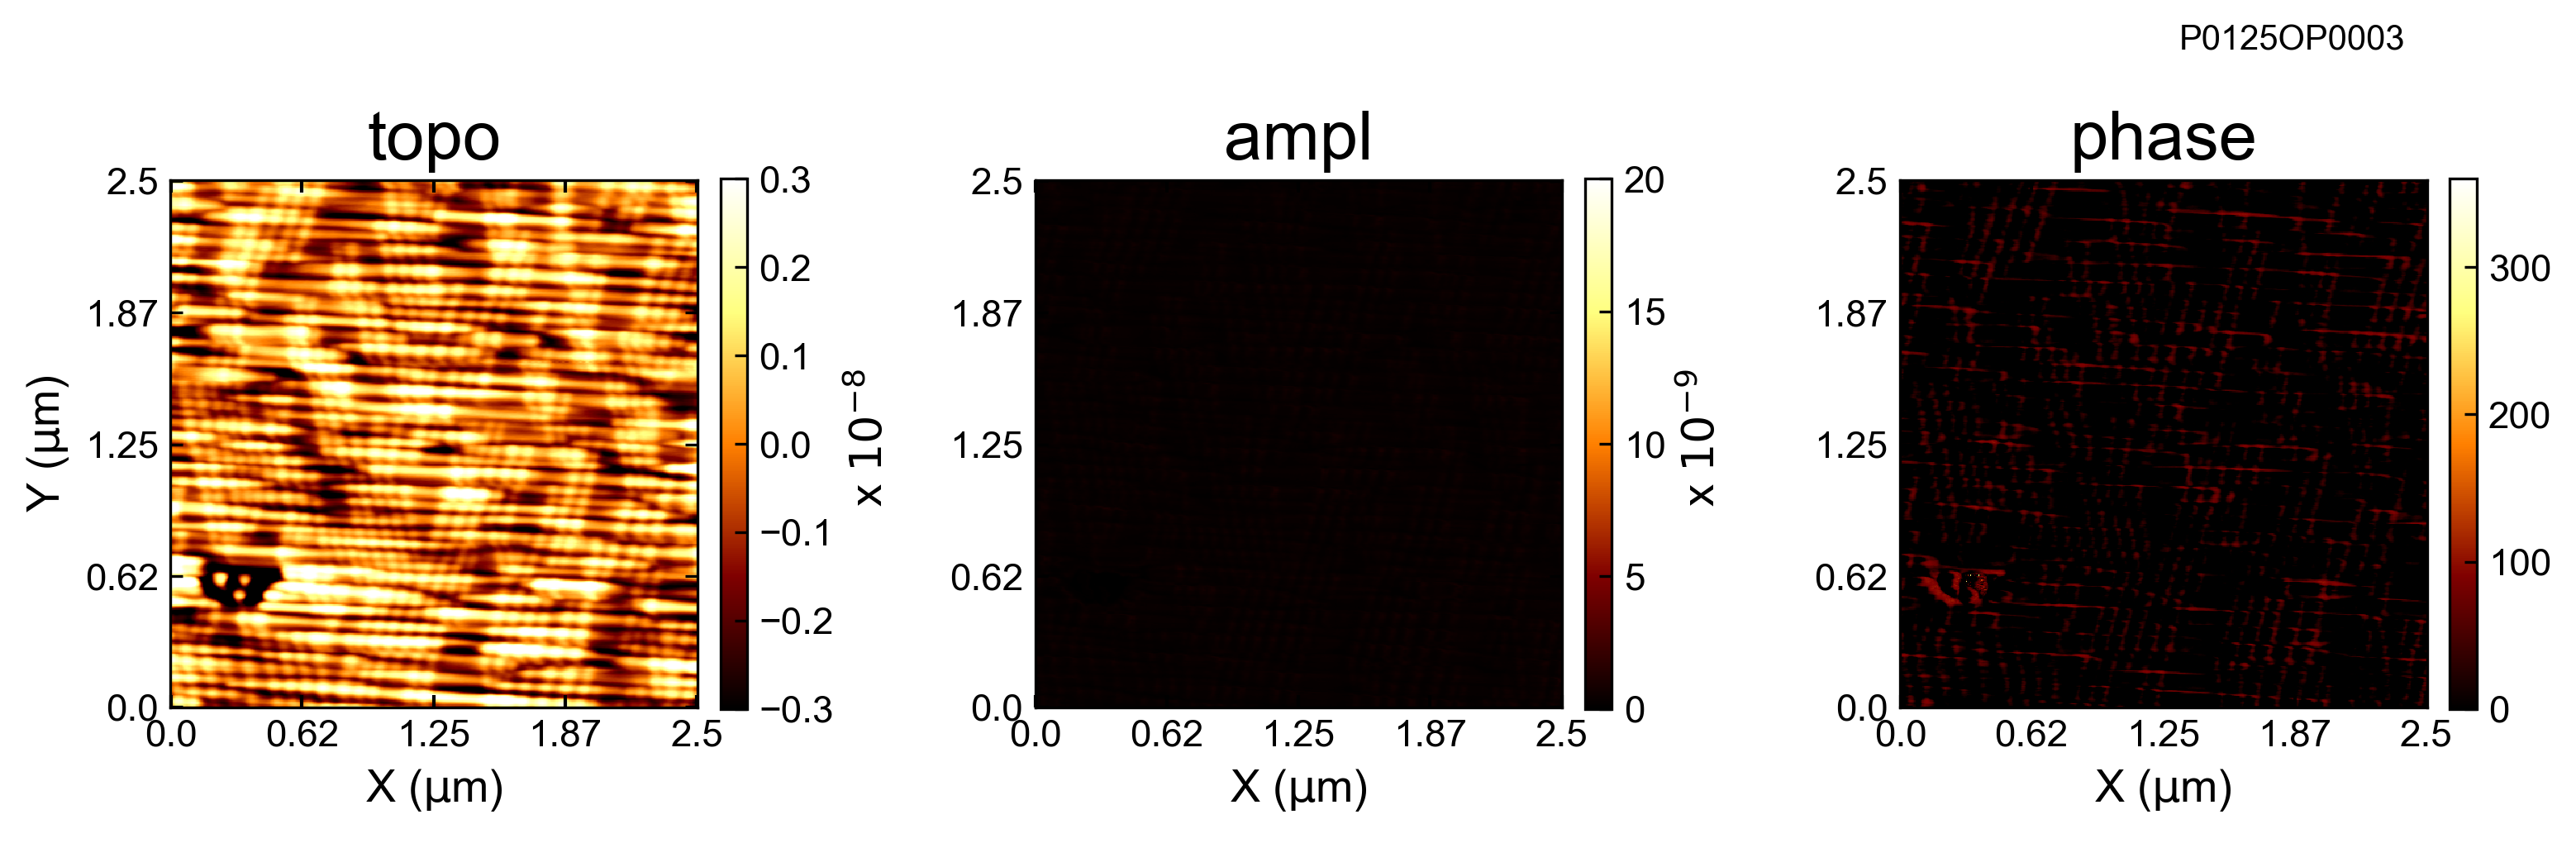

In [46]:

%matplotlib inline
plt.style.use('PFM')

channel1 = [t1.T, a1.T, p1.T]
z_range = (-0.3,0.3)
a_range = (0, 20)
p_range = (0, 360)
ranges = [z_range, a_range, p_range]
fig, ax = plt.subplots( figsize=(12,4) )

gs = gridspec.GridSpec(1,3)
ax.axis('off')

fig, ax = multi_image_plot( channel1, expt, fig=fig, axis=ax, gs=gs, zrange=ranges, ntick=5 )

'''
Uncomment the below line to save the figure to a .SVG file. You can also change the filetype it saves 
by just changing the '.svg' section to '.png' or whatever your preference is. 
'''
#plt.savefig(diry + fnames[i][:-3] + '.svg', transparent=True)

fig.text(0.8, 0.9, fnames[i][:-3])


# Roughness calculations

In [35]:
avgT = np.average(t1)
roughness = np.std(t1)
print(roughness)

1.3649563e-09


In [95]:
plt.savefig(usid.hdf_utils.get_attributes(experiment[i]['Measurement_000'])['FileName'][:-1-3], fmt='png')
img_path = usid.hdf_utils.get_attributes(experiment[i]['Measurement_000'])['FileName'][:-1-3] + '.png'

IndexError: list index out of range

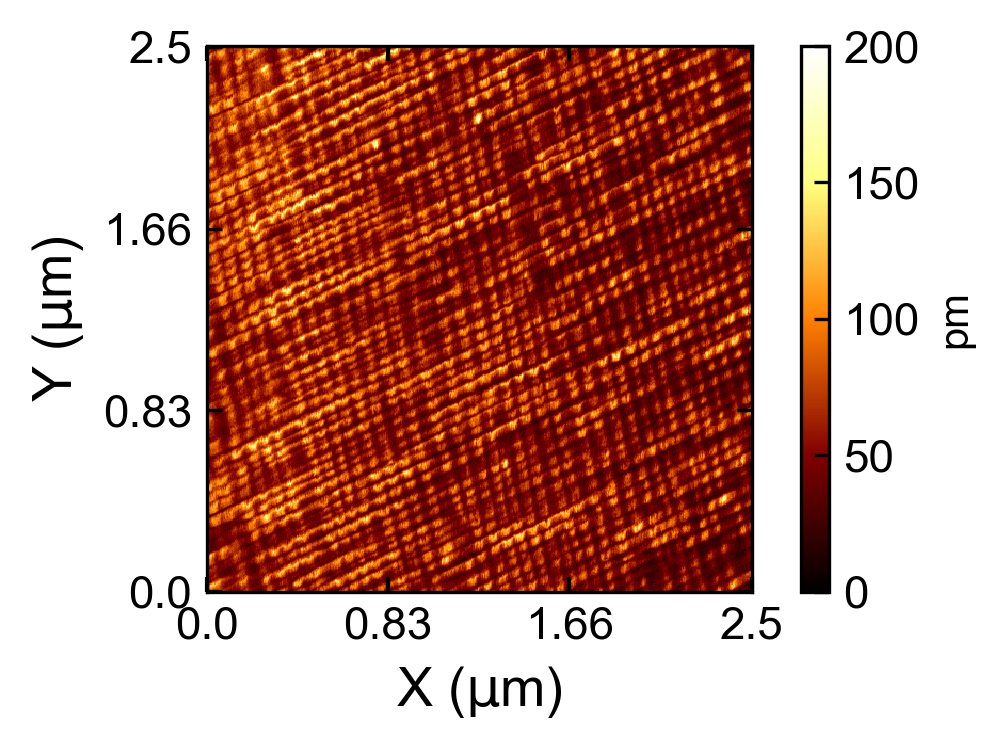

In [73]:
xvec = np.linspace( 0, 
                   usid.hdf_utils.get_attributes(expt[i]['Measurement_000'])['ScanSize']/10**(-6),
                   len(t1))
fig, ax = single_image_plot( a1/10**(-12), fnames[i], xvec, zrange=(0,200), cbar_label='pm')
fig.tight_layout()
plt.savefig(diry + fnames[i][:-3] + '_ampl.svg', transparent=True)

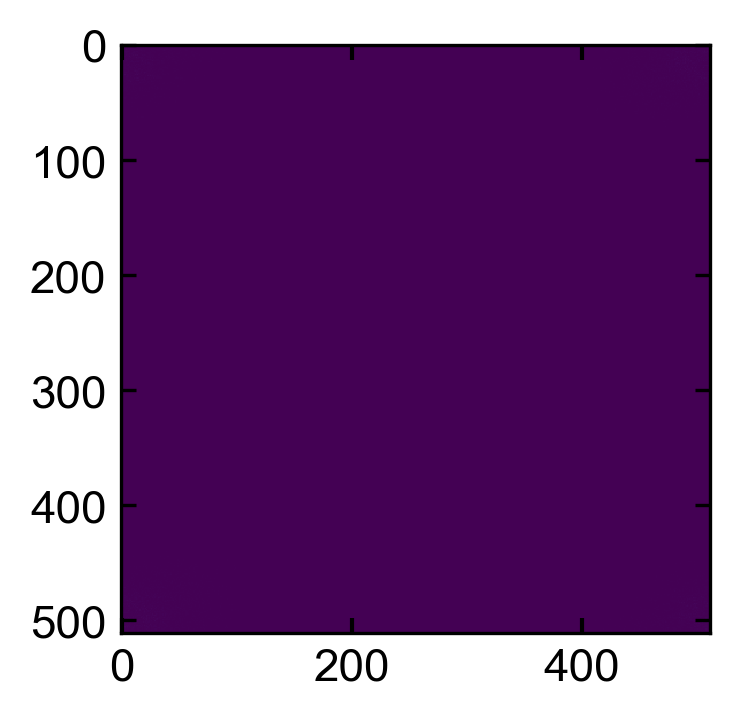

In [45]:
ff_a2 =  np.fft.fft2(a2)


plt.imshow(np.abs(ff_a2))

In [179]:
print('Datasets and datagroups within the file:\n------------------------------------')
usid.hdf_utils.print_tree(expt[10])

Datasets and datagroups within the file:
------------------------------------
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [320]:
left = Inches(1)
top = Inches(0)
#pic = slide.shapes.add_picture(img_path, left, top)

#left = Inches(5)
height = Inches(2.5)
pic = slide.shapes.add_picture(img_path, left, top, height=height)



In [324]:
prs.save('Crafting_copy_PFM.pptx')

NameError: name 'ampl1' is not defined

In [5]:


h5_topo = usid.USIDataset(h5_file['Measurement_000/Channel_006/Raw_Data'])
h5_ampl1 = usid.USIDataset(h5_file['Measurement_000/Channel_001/Raw_Data'])
h5_phase1 = usid.USIDataset(h5_file['Measurement_000/Channel_003/Raw_Data'])
h5_ampl2 = usid.USIDataset(h5_file['Measurement_000/Channel_002/Raw_Data'])
h5_phase2 = usid.USIDataset(h5_file['Measurement_000/Channel_005/Raw_Data'])

z_range = [ (0.0, 0.3), (0, 2), (0, 360) ]

fig, ax = multi_image_plot( [h5_topo.get_n_dim_form().squeeze(), h5_ampl1.get_n_dim_form().squeeze(), h5_phase1.get_n_dim_form().squeeze()], 
                           ['topo', 'ampl', 'phase'], zrange=z_range )

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Channel_006
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28d30fefa48>)

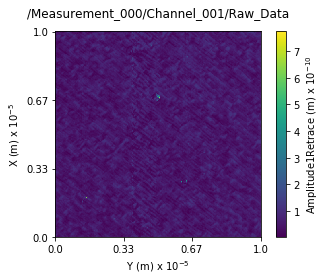